# An Analysis of Two Soccer Datasets
By: Corey Wang for NICO-102

In this project, I analyzed soccer dataset of both real life soccer players/teams and FIFA. The video game player stats were taken mainly from the FIFA franchise.

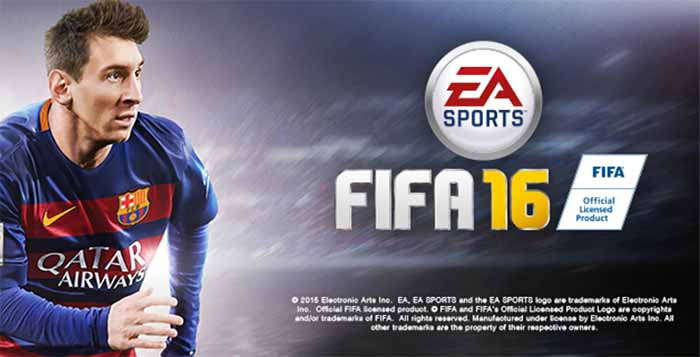\
Figure 1: FIFA 2016 cover [1]

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import my_code as code

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import pyplot
plt.style.use('seaborn-pastel')
import numpy as np

# Importing Data
Because the most recent complete dataset of real-life soccer players I could find was from 2016 for the European leagues, I also used the data from FIFA 2016. The real-life dataset was provided in a SQLite database [2] and the FIFA career mode data was provided in csv format [3], and I imported these into the appropriate variables.

### Importing the FIFA dataset from csv

In [4]:
# Defining file paths
euro_data_path = 'data/database.sqlite'
fifa_data_path = 'data/FIFA/players_16.csv'

In [5]:
# Importing FIFA data
fifa_data = code.import_csv(fifa_data_path)
fifa_data[0:2] # Display first two rows

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,...,64+3,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3


In [6]:
# Removing unnecessary columns/data
del fifa_data['sofifa_id']
del fifa_data['player_url']
fifa_data[0:2] # Display first two rows

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,94,95,...,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,93,93,...,64+3,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3


In [7]:
fifa_data.shape[0] # To find number of rows, number of players in FIFA dataset

14881

### Importing data from soccer database
The data set containing match history for real life soccer came in the form of a .sqlite file, which is a database. The database contained several tables, each of which could be converted into Pandas dataframes.

#### Importing player data, this data wasn't needed because it was also from FIFA

In [8]:
sql_player_data = code.import_sql_player_data(euro_data_path)
sql_player_data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [9]:
sql_player_data.shape # Data set includes 183,978 players

(183978, 42)

### Importing match data

In [10]:
sql_match_data = code.import_sql_match_data(euro_data_path)
sql_match_data.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [11]:
sql_match_data.shape # Data set includes 25,979 matches

(25979, 115)

#### Importing team data from database
Because the other tables in the database only contain the team API number instead of team names, I needed dictionaries to convert back and forth.

In [12]:
sql_team_data = code.import_sql_team_data(euro_data_path)
sql_team_data.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [13]:
sql_team_data.shape # Data set includes 299 teams

(299, 5)

#### Creating a dictionary of team names to api_id numbers and vice versa

In [14]:
name_id_dict = code.create_name_id_dict(sql_team_data)
print(name_id_dict)

{'KRC Genk': 9987, 'Beerschot AC': 9993, 'SV Zulte-Waregem': 10000, 'Sporting Lokeren': 9994, 'KSV Cercle Brugge': 9984, 'RSC Anderlecht': 8635, 'KAA Gent': 9991, 'RAEC Mons': 9998, 'FCV Dender EH': 7947, 'Standard de Liège': 9985, 'KV Mechelen': 8203, 'Club Brugge KV': 8342, 'KSV Roeselare': 9999, 'KV Kortrijk': 8571, 'Tubize': 4049, 'Royal Excel Mouscron': 274581, 'KVC Westerlo': 10001, 'Sporting Charleroi': 9986, 'Sint-Truidense VV': 9997, 'Lierse SK': 9989, 'KAS Eupen': 6351, 'Oud-Heverlee Leuven': 1773, 'Waasland-Beveren': 8475, 'KV Oostende': 8573, 'Manchester United': 10260, 'Newcastle United': 10261, 'Arsenal': 9825, 'West Bromwich Albion': 8659, 'Sunderland': 8472, 'Liverpool': 8650, 'West Ham United': 8654, 'Wigan Athletic': 8528, 'Aston Villa': 10252, 'Manchester City': 8456, 'Everton': 8668, 'Blackburn Rovers': 8655, 'Middlesbrough': 8549, 'Tottenham Hotspur': 8586, 'Bolton Wanderers': 8559, 'Stoke City': 10194, 'Hull City': 8667, 'Fulham': 9879, 'Chelsea': 8455, 'Portsmout

In [15]:
id_name_dict = code.create_id_name_dict(sql_team_data) # May not be used at all
print(id_name_dict)

{9987: 'KRC Genk', 9993: 'Beerschot AC', 10000: 'SV Zulte-Waregem', 9994: 'Sporting Lokeren', 9984: 'KSV Cercle Brugge', 8635: 'RSC Anderlecht', 9991: 'KAA Gent', 9998: 'RAEC Mons', 7947: 'FCV Dender EH', 9985: 'Standard de Liège', 8203: 'KV Mechelen', 8342: 'Club Brugge KV', 9999: 'KSV Roeselare', 8571: 'KV Kortrijk', 4049: 'Tubize', 9996: 'Royal Excel Mouscron', 10001: 'KVC Westerlo', 9986: 'Sporting Charleroi', 9997: 'Sint-Truidense VV', 9989: 'Lierse SK', 6351: 'KAS Eupen', 1773: 'Oud-Heverlee Leuven', 8475: 'Waasland-Beveren', 8573: 'KV Oostende', 274581: 'Royal Excel Mouscron', 10260: 'Manchester United', 10261: 'Newcastle United', 9825: 'Arsenal', 8659: 'West Bromwich Albion', 8472: 'Sunderland', 8650: 'Liverpool', 8654: 'West Ham United', 8528: 'Wigan Athletic', 10252: 'Aston Villa', 8456: 'Manchester City', 8668: 'Everton', 8655: 'Blackburn Rovers', 8549: 'Middlesbrough', 8586: 'Tottenham Hotspur', 8559: 'Bolton Wanderers', 10194: 'Stoke City', 8667: 'Hull City', 9879: 'Fulham

# Creating a list of team standings
I then created a dictionary associating each team's name to their ranking, and reversed it so a higher number corresponded to a better ranking that season. At first I tried to use scrape the data from the Wikipedia table shown in figure 2 using the the scrape_team_rankings function, but then I realized that the team names weren't consistent with the FIFA dataset and input them manually.

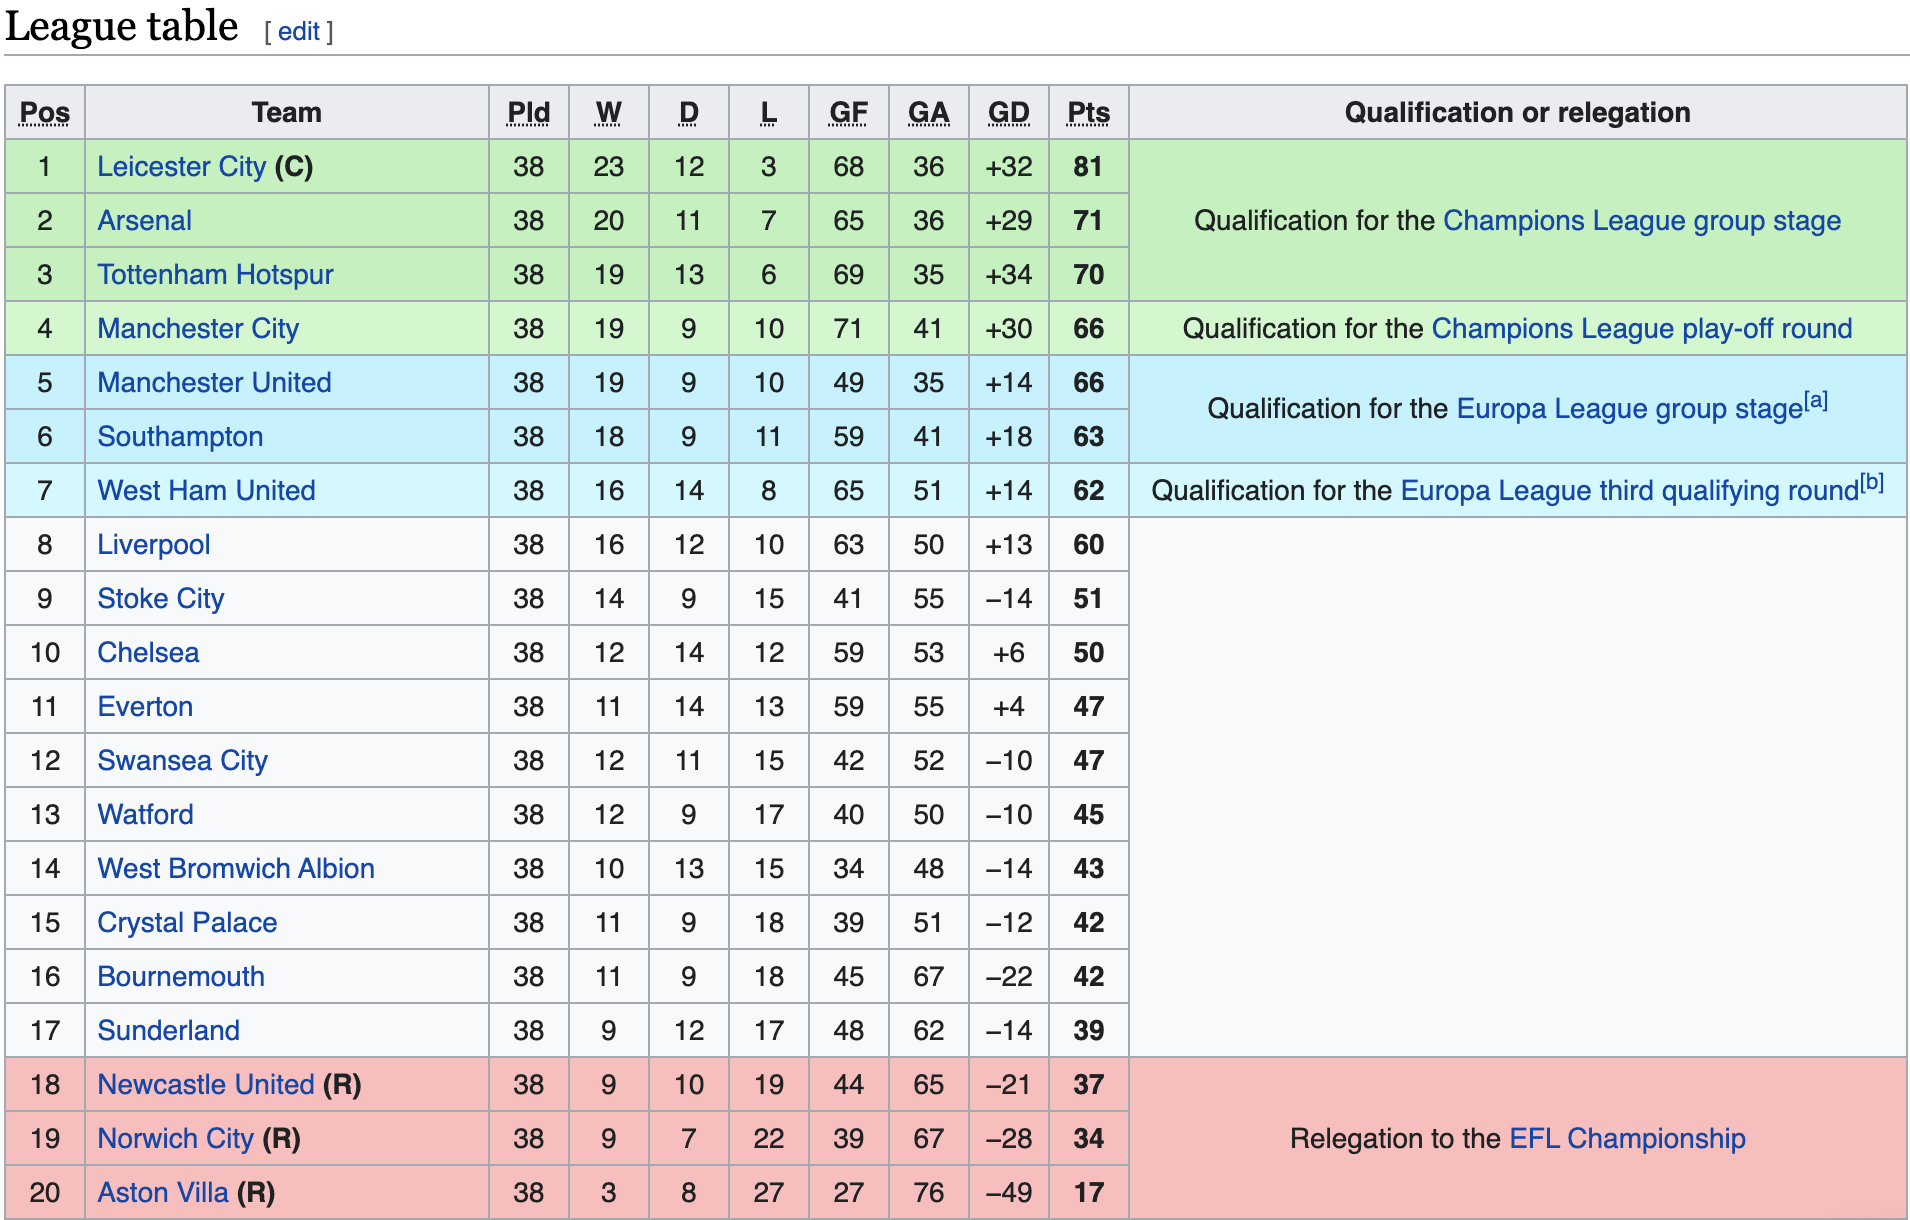
Figure 2: Wikipedia team standings table [4]

#### Creating dictionaries associating team name keys to ranks

In [16]:
rankings_2016 = code.team_rankings()
print('2016 Rankings \n\n', rankings_2016, '\n')

2016 Rankings 

 {'Leicester City': 1, 'Arsenal': 2, 'Tottenham Hotspur': 3, 'Manchester City': 4, 'Manchester United': 5, 'Southampton': 6, 'West Ham United': 7, 'Liverpool': 8, 'Stoke City': 9, 'Chelsea': 10, 'Everton': 11, 'Swansea City': 12, 'Watford': 13, 'West Bromwich Albion': 14, 'Crystal Palace': 15, 'Bournemouth': 16, 'Sunderland': 17, 'Newcastle United': 18, 'Norwich City': 19, 'Aston Villa': 20} 



# FIFA Dataset Observations
I started by creating some interesting figures based on statistics from the FIFA dataset alone. These involved a scatterplot of age vs. wage/value, an analysis of which positions earned the most, a histogram of where most professional players are from, a scatterplot of team ranking (success) vs. average age, and more.

### 1) Histogram of player nationalities
Histogram displaying the frequency of players from each country in the entire dataset for the top 20 countries

In [17]:
top_20_countries = code.top_n_countries(fifa_data, 20)
print(type(top_20_countries))

<class 'list'>


In [18]:
code.top_n_countries(fifa_data, 20)

[('England', 1450),
 ('Argentina', 1057),
 ('Spain', 987),
 ('France', 853),
 ('Germany', 649),
 ('Italy', 647),
 ('Colombia', 535),
 ('Brazil', 420),
 ('Mexico', 387),
 ('Chile', 376),
 ('Republic of Ireland', 374),
 ('Netherlands', 349),
 ('United States', 340),
 ('Saudi Arabia', 329),
 ('Portugal', 324),
 ('Sweden', 324),
 ('Poland', 307),
 ('Scotland', 286),
 ('Norway', 285),
 ('Turkey', 280)]

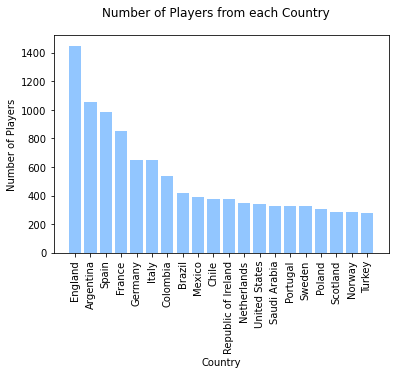

In [19]:
code.country_histogram(top_20_countries)

code.save_fig_as_png('Top 20 countries histogram')

I saw from the histogram that England had the most professional players in FIFA, with Argentina in second and Spain in third.

#### Analyzing a single club
I then wrote a function that separated the players of a single team into a new dataframe, and separated my favorite team Liverpool into a new variable to further study their virtual stats.

In [20]:
# Load team into a separate dataframe
liverpool_data = code.single_team(fifa_data, 'Liverpool')
# Preview data
liverpool_data.head()

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
53,Coutinho,Philippe Coutinho Correia,23,1992-06-12,171,68,Brazil,Liverpool,84,88,...,62+1,58+1,58+1,58+1,62+1,57+1,45+1,45+1,45+1,57+1
89,D. Sturridge,Daniel Andre Sturridge,25,1989-09-01,188,76,England,Liverpool,83,86,...,54+1,52+1,52+1,52+1,54+1,51+1,44+1,44+1,44+1,51+1
127,C. Benteke,Christian Benteke Liolo,24,1990-12-03,190,83,Belgium,Liverpool,82,86,...,55+1,54+1,54+1,54+1,55+1,52+1,52+1,52+1,52+1,52+1
134,Roberto Firmino,Roberto Firmino Barbosa de Oliveira,23,1991-10-02,181,76,Brazil,Liverpool,82,86,...,63+0,61+0,61+0,61+0,63+0,59+0,52+0,52+0,52+0,59+0
190,N. Clyne,Nathaniel Edwin Clyne,24,1991-04-05,175,67,England,Liverpool,81,85,...,81+0,77+0,77+0,77+0,81+0,81+0,77+0,77+0,77+0,81+0


### 2) Age vs. wage scatterplot
I created a plot of age vs. salary, but instead of plotting a point for all 14,881 players in the entire dataset I only used the players from specific teams separated using the function described above.

Best fit line:  wage = 5140.119091924085 * age + -45944.36174171962


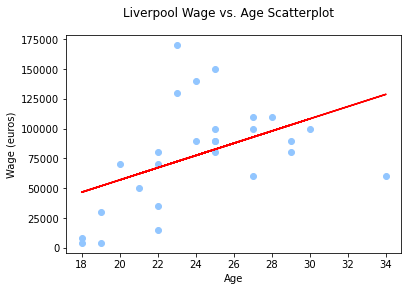

In [21]:
code.wage_age_scatter(code.single_team(fifa_data, 'Liverpool'), 'Liverpool Wage vs. Age Scatterplot')

code.save_fig_as_png('Liverpool age vs wage')

Best fit line:  wage = 13820.75991189427 * age + -224318.2819383259


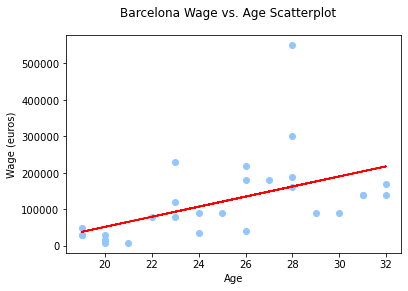

In [22]:
code.wage_age_scatter(code.single_team(fifa_data, 'FC Barcelona'), 'Barcelona Wage vs. Age Scatterplot')

code.save_fig_as_png('Barcelona age vs wage')

### Averaging age of players in a dataframe
I wrote the function average_age to calculate the average age of all players in a dataframe, which I applied to a specific team as with the plots above.

In [23]:
# Average age of all Liverpool players in 2016
liverpool_average_age = code.average_age(code.single_team(fifa_data, 'Liverpool'))
print('Average age of Liverpool roster:', liverpool_average_age)

Average age of Liverpool roster: 24.185185185185187


### 3) Bar Chart of average PL team ages
I first retrieved a list of all Premier League teams from the team rankings dictionary, then calculated the average age for all of them (from 2016) and plotted them in a bar chart.

In [24]:
# Creating a list of the PL teams
PL_teamlist = []
for key in rankings_2016:
    PL_teamlist.append(key)
print(PL_teamlist)

['Leicester City', 'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Southampton', 'West Ham United', 'Liverpool', 'Stoke City', 'Chelsea', 'Everton', 'Swansea City', 'Watford', 'West Bromwich Albion', 'Crystal Palace', 'Bournemouth', 'Sunderland', 'Newcastle United', 'Norwich City', 'Aston Villa']


In [25]:
avg_age_list, mean, stdev = code.average_ages(fifa_data, PL_teamlist)
print(avg_age_list)
print('\n')
print('Mean: ', mean)
print('Standard Deviation: ', stdev)

[25.741935483870968, 24.4375, 22.766666666666666, 26.20689655172414, 24.703703703703702, 24.35483870967742, 24.129032258064516, 24.185185185185187, 26.964285714285715, 24.071428571428573, 25.75, 25.766666666666666, 26.857142857142858, 25.366666666666667, 26.75862068965517, 25.79310344827586, 25.5625, 24.666666666666668, 25.517241379310345, 24.79310344827586]


Mean:  25.219659233363352
Standard Deviation:  1.0532513388078113


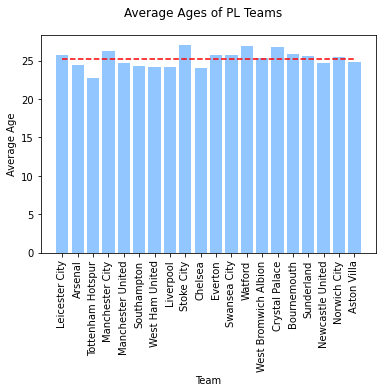

In [26]:
code.average_ages_barchart(avg_age_list, PL_teamlist)

code.save_fig_as_png('Average ages of premier league teams')

Shown in the plot above, there is very little variation in average ages between different Premier League teams, with the average of team averages being 25.22 years old and a standard deviation of 1.05 years which means most values of team average ages lie very close to the mean.

### 4) Scatterplot of 2016 team ranking vs. average age
Then, using the same teams from the Premier League, I created a scatterplot of ranking (using the reversed version where a higher number corresponded to a better ranking) vs. average age. With the ages all being so similar, I don't expect there to be any noticeable trend but thought it might be an interesting plot to create.

In [27]:
len(avg_age_list)

20

In [28]:
avg_age_list

[25.741935483870968,
 24.4375,
 22.766666666666666,
 26.20689655172414,
 24.703703703703702,
 24.35483870967742,
 24.129032258064516,
 24.185185185185187,
 26.964285714285715,
 24.071428571428573,
 25.75,
 25.766666666666666,
 26.857142857142858,
 25.366666666666667,
 26.75862068965517,
 25.79310344827586,
 25.5625,
 24.666666666666668,
 25.517241379310345,
 24.79310344827586]

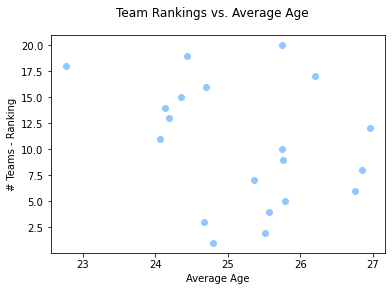

In [29]:
code.ranking_v_average_age(avg_age_list)

code.save_fig_as_png('Team ranking vs average age of teams')

There was no noticeable correlation so I didn't try to use any line fitting.

### 5) Average wages for different positions
Lastly, just out of interest I compared the average FIFA wages for left and right footed players by separating the data and calculating the average wage using the previously written function.

In [30]:
print('Left footed: ', code.average_salary(fifa_data.loc[fifa_data['preferred_foot'] == 'Left']), 'euros')
print('Right footed: ', code.average_salary(fifa_data.loc[fifa_data['preferred_foot'] == 'Right']), 'euros')

Left footed:  15314.577259475218 euros
Right footed:  14560.562396297266 euros


# Analyzing the Match Data
Next I used the match data from the sqlite database to retrieve information from real life matches in the 2015-16 season, which was not available from the fifa data set. Because the table was imported into a Pandas dataframe, each row represented and contained lots of information about a unique game between two teams.

#### Filtering match data to 2016 only
I started by taking the entire table of matches, stored as a dataframe in the sql_match_data variable and filtering out everything except games from the 2015-2016 (2016) season.

In [31]:
matches_2016 = code.filter_matches(sql_match_data, '2015/2016')
print(matches_2016.shape) # Dataframe contains info about 3326 matches from the 2016 season
matches_2016.head() # Preview match data to ensure it was filtered properly

(3326, 115)


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1488,1489,1,1,2015/2016,1,2015-07-24 00:00:00,1979832,9997,8342,2,...,NaN,4.4,4.0,1.75,NaN,NaN,NaN,NaN,NaN,NaN
1489,1490,1,1,2015/2016,1,2015-07-25 00:00:00,1979833,8571,9985,2,...,NaN,2.7,3.4,2.63,NaN,NaN,NaN,NaN,NaN,NaN
1490,1491,1,1,2015/2016,1,2015-07-25 00:00:00,1979834,9987,1773,3,...,NaN,1.6,4.1,5.50,NaN,NaN,NaN,NaN,NaN,NaN
1491,1492,1,1,2015/2016,1,2015-07-25 00:00:00,1979835,8573,8203,3,...,NaN,2.5,3.3,2.88,NaN,NaN,NaN,NaN,NaN,NaN
1492,1493,1,1,2015/2016,1,2015-07-25 00:00:00,1979836,10000,9994,3,...,NaN,2.3,3.4,3.10,NaN,NaN,NaN,NaN,NaN,NaN


#### Goals scored and conceded function
I wrote a function that given the match data and team name, would calculate the total number of goals conceded and scored from all match data. I did this by separating the 2016 games dataframes into two dataframes, one where the desired team was home and the other away. To calculate goals, I summed home team goals when the team was home and away team goals when the team was having an away game. I did the opposite to calculate goals conceded and tested it on three different teams. Although the database may not include all matches which may lead to discrepancies between results and actual numbers, I believe comparisons between teams will still be valid.

In [32]:
code.scored_and_conceded(matches_2016, 'Liverpool', name_id_dict)

(63, 50)

In [33]:
code.scored_and_conceded(matches_2016, 'FC Barcelona', name_id_dict)

(112, 29)

In [34]:
print('Real Madrid', code.scored_and_conceded(matches_2016, 'Real Madrid CF', name_id_dict))
print('Goals scored: ', code.scored_and_conceded(matches_2016, 'Real Madrid CF', name_id_dict)[0])
print('Goals conceded: ', code.scored_and_conceded(matches_2016, 'Real Madrid CF', name_id_dict)[1])

Real Madrid (110, 34)
Goals scored:  110
Goals conceded:  34


### 1) Relationship between season ranking and goals scored (Scatterplot)

Best fit line:  goals = -1.8406015037593983 * rank + 70.6263157894737


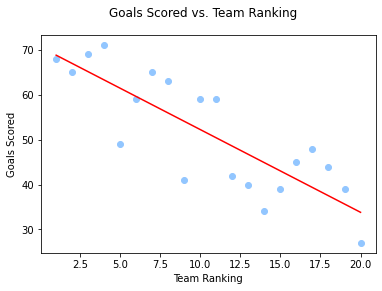

In [35]:
code.goals_scored_ranking_scatter(matches_2016, PL_teamlist, name_id_dict)

code.save_fig_as_png('Goals scored v season ranking')

As expected, the higher ranked teams (smaller team ranking number) corresponded to higher numbers of goals scored. I expect the opposite to be true for the relationship between ranking and goals conceded.

### 2) Relationship between season ranking and goals conceded (Scatterplot)

Best fit line:  goals = 1.8225563909774447 * rank + 32.16315789473685


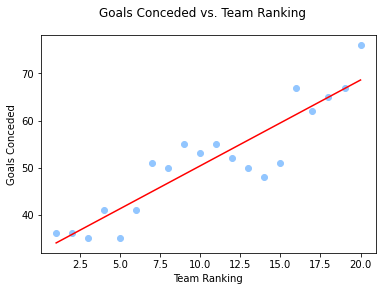

In [36]:
code.goals_conceded_ranking_scatter(matches_2016, PL_teamlist, name_id_dict)

code.save_fig_as_png('Goals conceded v season ranking')

As with the previous plot, there is also a strong correlation with the linear line of best fit being fairly close to most points which shows that the lower ranked teams conceded more goals.

### 3) Relationship between goals scored and conceded

Best fit line:  goals scored = -0.7410412440838394 * goals conceded + 89.31541582150098


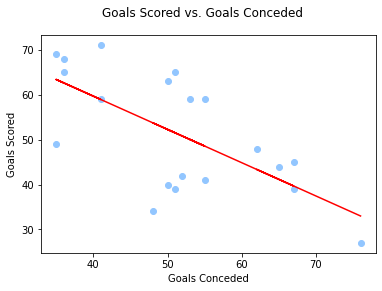

In [37]:
code.goals_scored_v_conceded(matches_2016, PL_teamlist, name_id_dict)

code.save_fig_as_png('Goals scored v goals conceded')

I did not observe a very strong correlation between the two.

# Relationship between goals scored and average traits of a team
I looked for connections between the goals scored and characteristics of the teams such as the average height of attackers. This required me to use data from both datasets to make the comparison.

### 1) Relationship between goals scored and average height of a team
I chose this because I thought it would be interesting to see whether taller players might be better at scoring headers, resulting in more goals.

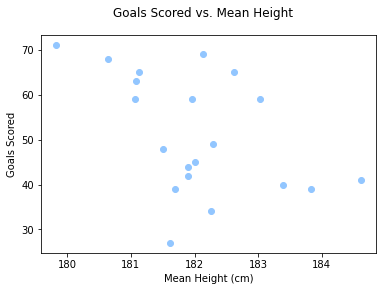

In [38]:
code.goals_v_team_height(matches_2016, PL_teamlist, name_id_dict, fifa_data)

code.save_fig_as_png('Goals scored v average team height')

### 2) Relationship between goals conceded and average goalie height of a team
I also thought it would be interesting to see whether taller average goalkeeper heights would save more goals in general.

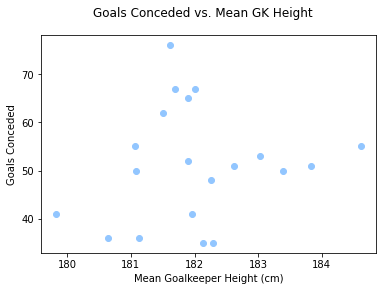

In [39]:
code.goals_v_goalie_height(matches_2016, PL_teamlist, name_id_dict, fifa_data)

code.save_fig_as_png('Goals conceded v average goalkeeper height')

Inspecting these graphs, there didn't seem to be any obvious trends so I didn't plot lines of best fit for either of the plots.

I was also considering looking for a relationship between goals scored/conceded and average team age, but as seen prior with how close all the teams' average ages are I figured it wouldn't produce anything meaningful.

# Conclusions
In this project I created several visual representations of statistics found in two datasets. The first of which only contained data from FIFA, and the second of which also contained FIFA data but also real-life data on soccer matches. Additionally, I also took the final league standings from Wikipedia as a crude measure of a team's success.

I found that out of the professional soccer players represented in FIFA, English players appeared most frequently. I also saw how the average age of teams in the Premier League didn't vary widely, with most sitting around 25 years old. Consequently, I failed to find any meaningful relationships between average age and a team's success, specifically when looking at the 2016 season.

When I looked at the match data, I found that higher-ranked teams generally scored more goals and conceded less and vice versa, which makes perfect sense as both are needed to win games. I also found there to be a negative correlation between goals scored and conceded.

Lastly, in looking at information from both datasets, I plotted goals scored against mean team height, and goals conceded against mean goalkeeper height. With both, I didn't manage to see any relationships between them.

# References
1. FIFA cover - https://www.fifagamenews.com/fifa-16-cover-was-revealed-by-ea-sports/
2. European soccer database - https://www.kaggle.com/hugomathien/soccer
3. FIFA complete dataset - https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset
4. 2015-2016 team ranking - https://en.wikipedia.org/wiki/2015%E2%80%9316_Premier_League